---
title: STATS 3DA3
subtitle: Homework Assignment 6
author: "Shujia Zhang(400390028), Yunxin Li(400323756), Ling Dai(400220798)"
date: 04/18/2024
format: pdf
header-includes:
   - \usepackage{amsmath}
   - \usepackage{bbm}
   - \usepackage{array}
   - \usepackage{multirow}
   - \usepackage{graphicx}
   - \usepackage{float}
   - \usepackage{apacite}
   - \usepackage{natbib}
execute: 
  echo: true
  warning: false
fontsize: 11pt
geometry: margin = 1in
linestretch: 1.5
bibliography: ass6.bib
---

\newpage

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [103]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [104]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadata 
print(chronic_kidney_disease.metadata) 
  
# variable information 
print(chronic_kidney_disease.variables) 


{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [105]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,14.2,51.0,7200.0,5.9,no,no,no,good,no,no


In [106]:
y

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [107]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [108]:
y.dtypes

class    object
dtype: object

In [109]:
#to see if "rbc" is binary, since from the website inormation I found that this variable should be binary.
X['rbc'].value_counts()

rbc
normal      201
abnormal     47
Name: count, dtype: int64

In [110]:
#to see if "pc" is binary, since from the website inormation I found that this variable should be binary.
X['pc'].value_counts()

pc
normal      259
abnormal     76
Name: count, dtype: int64

In [111]:
#to see if "pcc" is binary, since from the website inormation I found that this variable should be binary.
X['pcc'].value_counts()

pcc
notpresent    354
present        42
Name: count, dtype: int64

In [112]:
#to see if "ba" is binary, since from the website inormation I found that this variable should be binary.
X['ba'].value_counts()

ba
notpresent    374
present        22
Name: count, dtype: int64

In [113]:
#to see if "htn" is binary, since from the website inormation I found that this variable should be binary.
X['htn'].value_counts()

htn
no     251
yes    147
Name: count, dtype: int64

In [114]:
#to see if "dm" is binary, since from the website inormation I found that this variable should be binary.
X['dm'].value_counts()

dm
no      260
yes     137
\tno      1
Name: count, dtype: int64

In [115]:
#find that "dm" is not binary, but it should be binary.
X_cat = set(X["dm"])
X_cat

{'\tno', nan, 'no', 'yes'}

In [116]:
#make "dm" become binary
X['dm'] = X['dm'].replace('\tno', 'no')
X_cat = set(X["dm"])
X_cat

/var/folders/4r/l7zfgmsx0_7_kz30gzg50y880000gn/T/ipykernel_4221/1663051033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dm'] = X['dm'].replace('\tno', 'no')


{nan, 'no', 'yes'}

In [117]:
#to double check if "dm" is binary now.
X['dm'].value_counts()

dm
no     261
yes    137
Name: count, dtype: int64

In [118]:
#to see if "cad" is binary, since from the website inormation I found that this variable should be binary.
X['cad'].value_counts()

cad
no     364
yes     34
Name: count, dtype: int64

In [119]:
#to see if "appet" is binary, since from the website inormation I found that this variable should be binary.
X['appet'].value_counts()

appet
good    317
poor     82
Name: count, dtype: int64

In [120]:
#to see if "pe" is binary, since from the website inormation I found that this variable should be binary.
X['pe'].value_counts()

pe
no     323
yes     76
Name: count, dtype: int64

In [121]:
#to see if "ane" is binary, since from the website inormation I found that this variable should be binary.
X['ane'].value_counts()

ane
no     339
yes     60
Name: count, dtype: int64

In [122]:
#to see if "class" is binary, since from the website inormation I found that this variable should be binary.
y['class'].value_counts()

class
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [123]:
#find "class" is not binary, but it should be ninary.
y_cat = set(y["class"])
y_cat

{'ckd', 'ckd\t', 'notckd'}

In [124]:
# make itbecome binary
y['class'] = y['class'].replace('ckd\t', 'ckd')
y_cat = set(y["class"])
y_cat

/var/folders/4r/l7zfgmsx0_7_kz30gzg50y880000gn/T/ipykernel_4221/3205154435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].replace('ckd\t', 'ckd')


{'ckd', 'notckd'}

In [125]:
#To double check if it is binary now.
y['class'].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

In [126]:
# number of missing values in X
X.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [127]:
# number of missing values in y
y.isnull().sum()

class    0
dtype: int64

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.

There are 400 observations and 25 variables in Chronic Kidney Disease dataset. There are 14 float64 type variables, and they are "age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc". There are 11 object type vaariables, and they are "rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "calss". In these 25 variables, all variables in X are covariates (consists 14 floats and 10 object) and the variable in y is the response (the variable "class" which is an object variable). Moreover, the response is "class" contains only 2 category:"ckd" or "not ckd", so the response is binary.

There are 9 missing values in "age", 12 missing values in "bp", 47 missing values in "sg", 46 missing values in "al", 49 missing values in "su", 152 missing values in "rbc", 65 missing values in "pc", 4 missing values in "pcc", 4 missing values in "ba", 44 missing values in "bgr", 19 missing values in "bu", 17 missing values in "sc", 87 missing values in "sod", 88 missing values in "pot", 52 missing values in "hemo", 71 missing values in "pcv", 106 missing values in "wbcc", 131 missing values in "rbcc", 2 missing values in "htn", 2 missing values in "dm", 2 missing values in "cad", 1 missing value in "appet", 1 missing value in "pe" and 1 missing value in "ane".

0 missing value in "class".

2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.

In [128]:
X1 = X.copy()
columns_to_convert = ['sg', 'al','su']
for col in columns_to_convert:
    X1[col] = pd.Categorical(X1[col])

object_convert =["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"]
for col in object_convert:
    X1[col] = X1[col].astype('category').cat.codes
X1.dtypes

age       float64
bp        float64
sg       category
al       category
su       category
rbc          int8
pc           int8
pcc          int8
ba           int8
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn          int8
dm           int8
cad          int8
appet        int8
pe           int8
ane          int8
dtype: object

In [129]:
#cat = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
#X = pd.get_dummies(X,columns=cat)
#caty = ['class']
#y = pd.get_dummies(y,columns=caty)

In [130]:
X1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,-1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,-1,1,0,0,NaN,...,11.3,38.0,6000.0,NaN,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,NaN,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [131]:
X1['sg'].value_counts()

sg
1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: count, dtype: int64

In [132]:
#why 3 categories?
X1['rbc'].value_counts()

rbc
 1    201
-1    152
 0     47
Name: count, dtype: int64

In [133]:
X1['pe'].value_counts()

pe
 0    323
 1     76
-1      1
Name: count, dtype: int64

In [134]:
float_col = X1.select_dtypes(include=['float64']).columns
object_col = X1.select_dtypes(include=['object']).columns

In [135]:
#way2
binary = {'rbc':{'normal':1,'abnormal':0},
          'pc':{'normal':1,'abnormal':0},
          'pcc':{'present':1,'notpresent':0},
          'ba':{'present':1,'notpresent':0},
          'htn':{'yes':1,'no':0},
          'dm':{'yes':1,'no':0},
          'cad':{'yes':1,'no':0},
          'appet':{'good':1,'poor':0},
          'pe':{'yes':1,'no':0},
          'ane':{'yes':1,'no':0}
          
          }

for i,j in binary.items():
    X1[i] = X1[i].replace(j)

X1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,-1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,-1,1,0,0,NaN,...,11.3,38.0,6000.0,NaN,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,NaN,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [136]:
scale = StandardScaler()
X1[float_col] = scale.fit_transform(X1[float_col])
X1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,1.020,1.0,0.0,-1,1,0,0,-0.341498,...,0.988022,0.569881,-0.206202,0.481295,1,1,0,0,0,0
1,-2.594124,-1.936857,1.020,4.0,0.0,-1,1,0,0,NaN,...,-0.421688,-0.098536,-0.818559,NaN,0,0,0,0,0,0
2,0.613295,0.258373,1.010,2.0,3.0,1,1,0,0,3.473064,...,-1.006202,-0.878356,-0.308261,NaN,0,1,0,1,0,1
3,-0.203139,-0.473370,1.005,4.0,0.0,1,0,1,0,-0.392022,...,-0.456071,-0.766953,-0.580420,-0.788961,1,0,0,1,1,1
4,-0.028189,0.258373,1.010,2.0,0.0,1,1,0,0,-0.530963,...,-0.318538,-0.432744,-0.376301,-0.104977,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,1.020,0.0,0.0,1,1,0,0,-0.101509,...,1.091172,0.904090,-0.580420,0.188159,0,0,0,0,0,0
396,-0.553039,-0.473370,1.025,0.0,0.0,1,1,0,0,-0.922524,...,1.366237,1.683910,-0.206202,1.458415,0,0,0,0,0,0
397,-2.302541,0.258373,1.020,0.0,0.0,1,1,0,0,-0.606749,...,1.125555,1.126896,-0.614440,0.676719,0,0,0,0,0,0
398,-2.010957,-1.205114,1.025,0.0,0.0,1,1,0,0,-0.429915,...,0.575424,1.349701,-0.410321,1.165279,0,0,0,0,0,0


3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

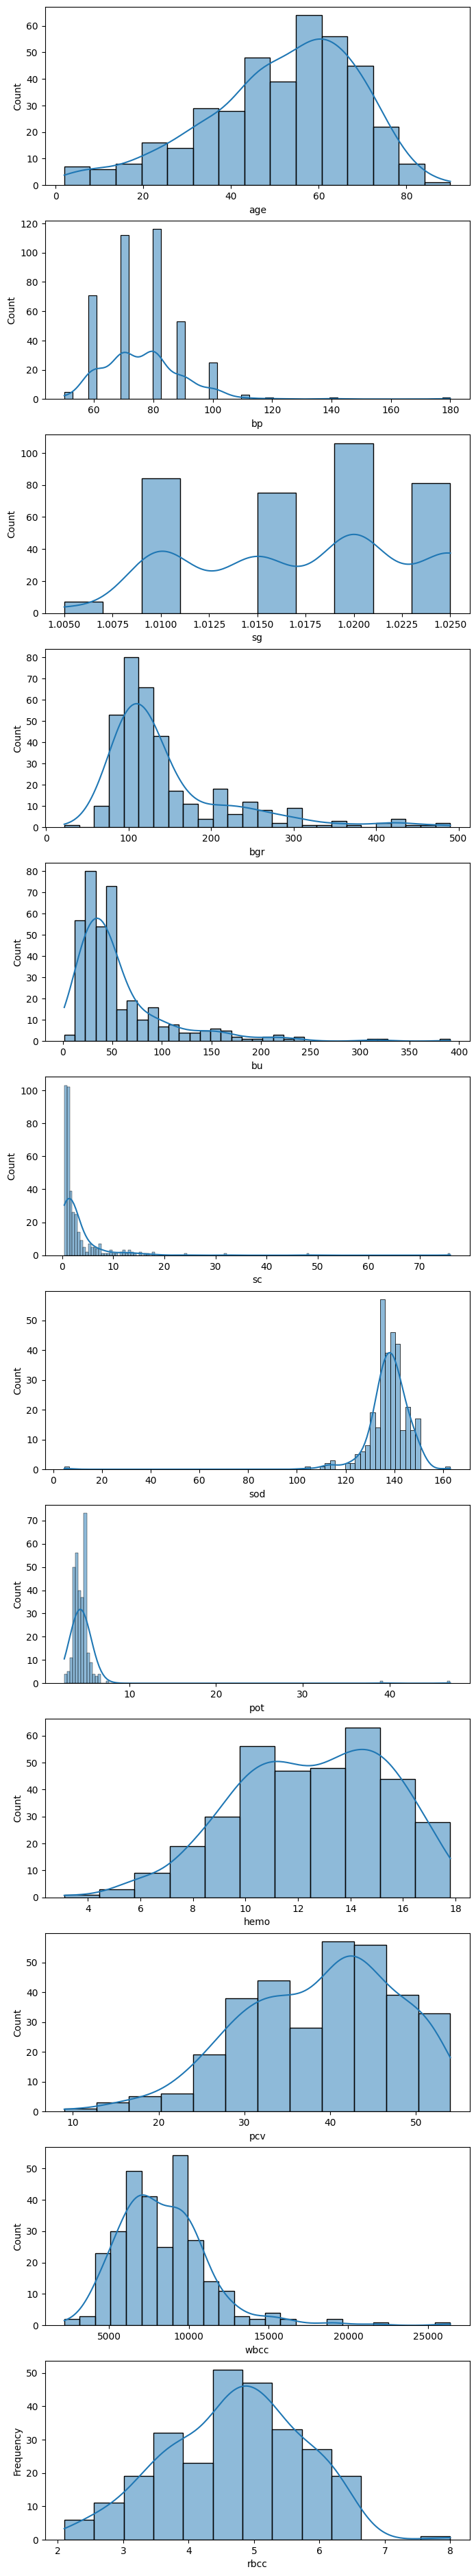

In [137]:
def plot_dist(data,features):
    fig,axes=plt.subplots(nrows=len(features),ncols=1,figsize=(8,4*len(features)))
    if len(features) == 1:
        axes = [axes]
    for ax,feature in zip(axes,features):
        sns.histplot(data[feature],kde=True,ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

numerical_cols = ["age","bp","sg","bgr","bu","sc","sod","pot","hemo","pcv","wbcc","rbcc"]
plt.show()
plot_dist(X,numerical_cols)

In [138]:
X1.describe()

,age,bp,rbc,pc,pcc,ba,bgr,bu,sc,sod,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
count,3.910000e+02,3.880000e+02,400.00000,400.000000,400.000000,400.000000,3.560000e+02,3.810000e+02,383.000000,3.130000e+02,...,3.480000e+02,3.290000e+02,2.940000e+02,2.690000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,9.994847e-17,-2.380684e-16,0.12250,0.485000,0.095000,0.045000,-1.796316e-16,-3.729883e-17,0.000000,2.270105e-17,...,4.083579e-17,1.295823e-16,1.450087e-16,8.452553e-16,0.362500,0.337500,0.080000,0.202500,0.187500,0.147500
std,1.001281e+00,1.001291e+00,0.93256,0.759089,0.325946,0.251262,1.001407e+00,1.001315e+00,1.001308,1.001601e+00,...,1.001440e+00,1.001523e+00,1.001705e+00,1.001864e+00,0.491628,0.483921,0.289499,0.408547,0.397163,0.362038
min,-2.885708e+00,-1.936857e+00,-1.00000,-1.000000,-1.000000,-1.000000,-1.591967e+00,-1.108830e+00,-0.466102,-1.280094e+01,...,-3.241109e+00,-3.329218e+00,-2.111312e+00,-2.547777e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-5.530393e-01,-4.733701e-01,-1.00000,0.000000,0.000000,0.000000,-6.193803e-01,-6.032459e-01,-0.378897,-2.433340e-01,...,-7.655198e-01,-7.669527e-01,-6.484596e-01,-7.889609e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.050779e-01,2.583733e-01,1.00000,1.000000,0.000000,0.000000,-3.414983e-01,-3.058433e-01,-0.309133,4.534651e-02,...,4.248496e-02,1.242700e-01,-1.381622e-01,9.044717e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.590867e-01,2.583733e-01,1.00000,1.000000,0.000000,0.000000,1.890038e-01,1.700008e-01,-0.047519,4.302539e-01,...,8.504897e-01,6.812843e-01,4.741947e-01,6.767192e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.246163e+00,7.575807e+00,1.00000,1.000000,1.000000,1.000000,4.319341e+00,6.613723e+00,12.719271,2.451017e+00,...,1.813219e+00,1.683910e+00,6.121486e+00,3.217231e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [139]:
X1.dtypes

age       float64
bp        float64
sg       category
al       category
su       category
rbc          int8
pc           int8
pcc          int8
ba           int8
bgr       float64
bu        float64
sc        float64
sod       float64
pot       float64
hemo      float64
pcv       float64
wbcc      float64
rbcc      float64
htn          int8
dm           int8
cad          int8
appet        int8
pe           int8
ane          int8
dtype: object

Since there are 25 variables and 400 observations in Chronic Kidney Disease dataset. 

1).There are 14 float64 type variables, and they are "age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc".
There are 11 object type vaariables, and they are "rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "calss".
In these 25 variables, all variables in X are covariates (consists 14 floats and 10 object) and the variable in y is the response (the variable "class" which is an object variable). Moreover, the response is "class" contains only 2 category:"ckd" or "not ckd", so the response is binary.

2).The number of features is 24, and they are: "age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc","rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "calss".

3).The number of observations is 400.
But we can see that the count of some variables is less than 400, for example: the count of age is 391 which is less than 400. This means there are missing values in some varibales in this dataset.

4). The type of variables: There are 14 float64 type variables, and they are "age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc".
There are 11 object type vaariables, and they are "rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane", "calss".
In these 25 variables, all variables in X are covariates (consists 14 floats and 10 object) and the variable in y is the response (the variable "class" which is an object variable). Moreover, the response is "class" contains only 2 category:"ckd" or "not ckd", so the respnse is binary.

5). Missing values: There are 9 missing values in "age", 12 missing values in "bp", 47 missing values in "sg", 46 missing values in "al", 49 missing values in "su", 152 missing values in "rbc", 65 missing values in "pc", 4 missing values in "pcc", 4 missing values in "ba", 44  missing values in "bgr", 19  missing values in "bu", 17  missing values in "sc", 87 missing values in "sod", 88 missing values in "pot", 52 missing values in "hemo", 71 missing values in "pcv", 106 missing values in "wbcc", 131 missing values in "rbcc", 2  missing values in "htn", 2  missing values in "dm", 2 missing values in "cad", 1 missing value in "appet", 1 missing value in "pe" and 1 missing value in "ane".

0 missing value in "class".

4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).

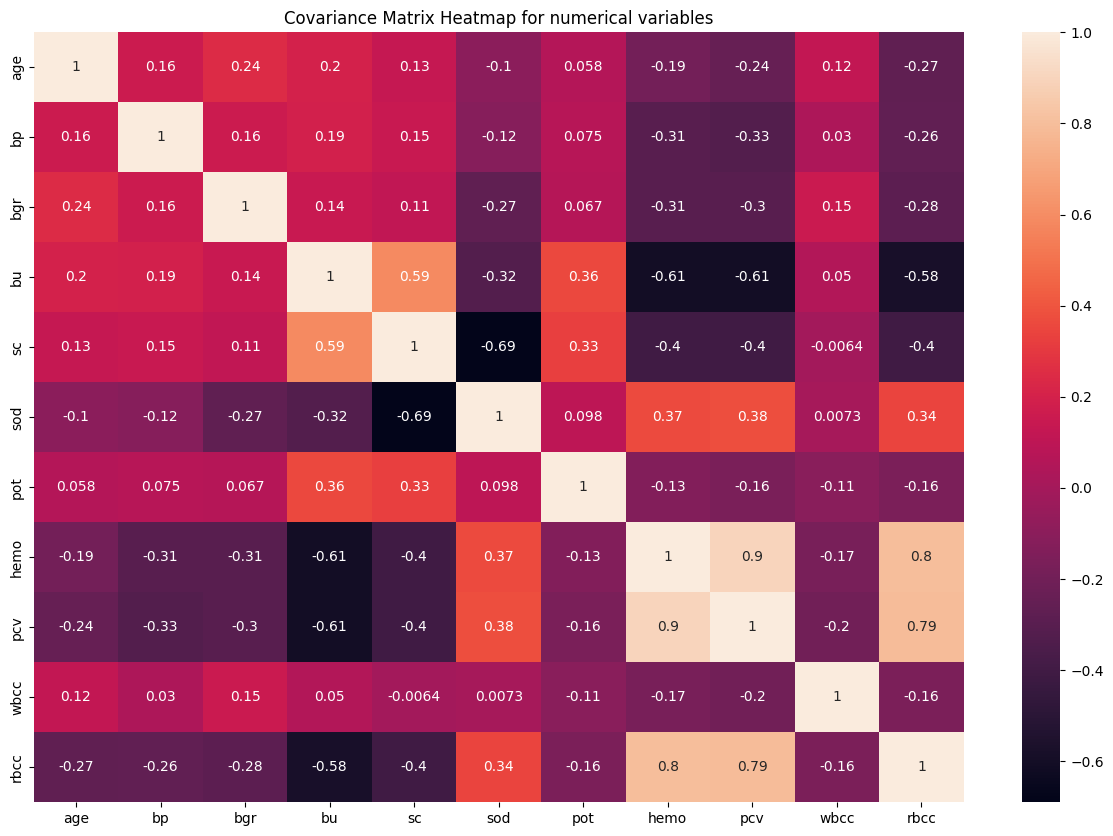

In [140]:
# prof says numerical variables shuold use heatmap, categorical variables should use use barplot.
#
#
#
#
#numerical variables:
float64=X1.select_dtypes(include=['float64'])
plt.figure(figsize=(15, 10))
sns.heatmap(float64.corr(), 
        annot=True)
plt.title('Covariance Matrix Heatmap for numerical variables')
plt.show()



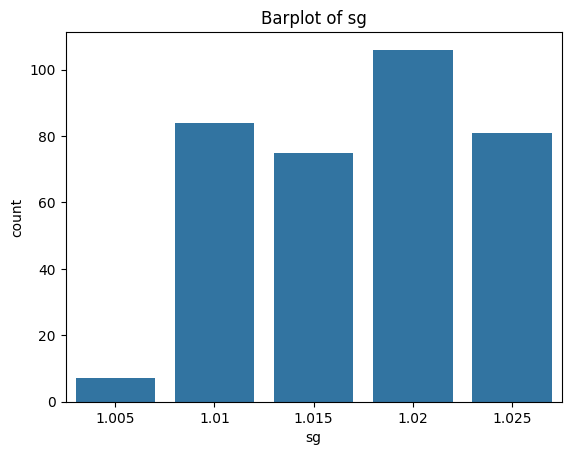

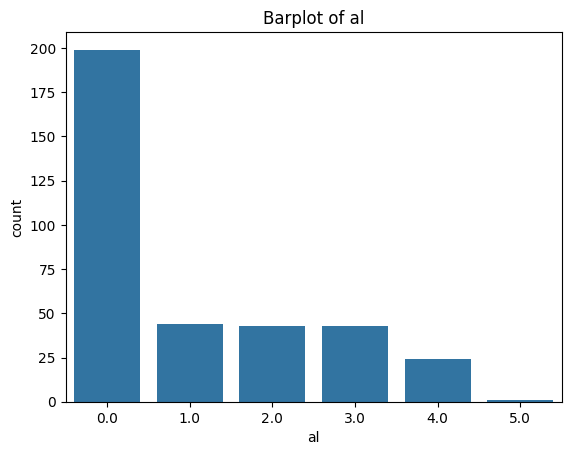

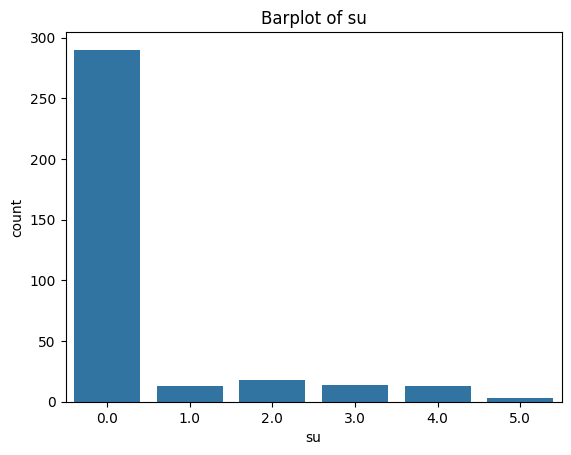

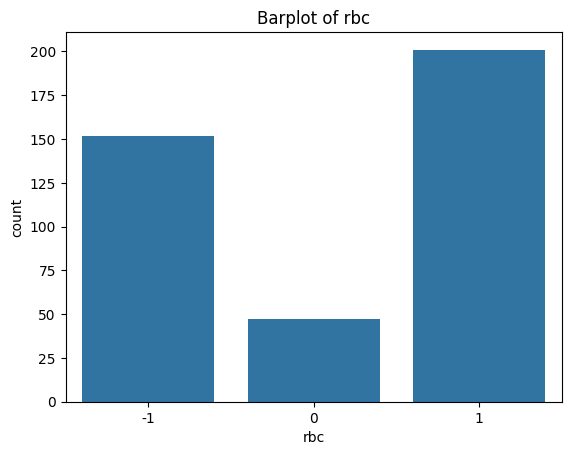

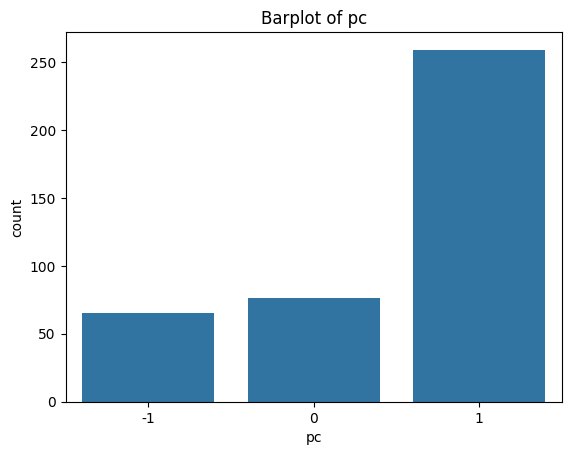

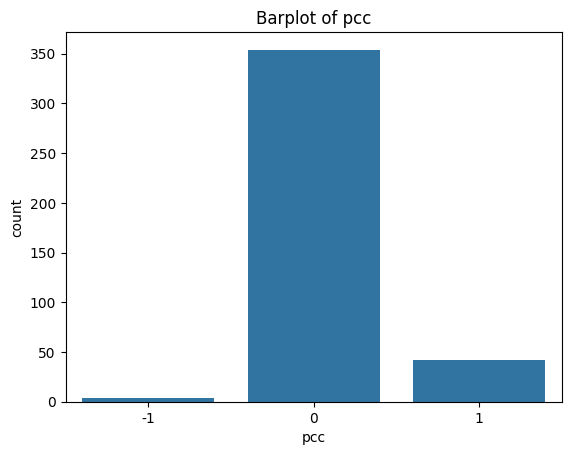

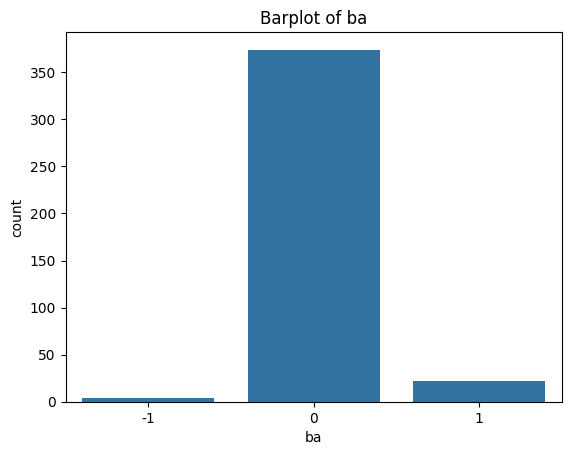

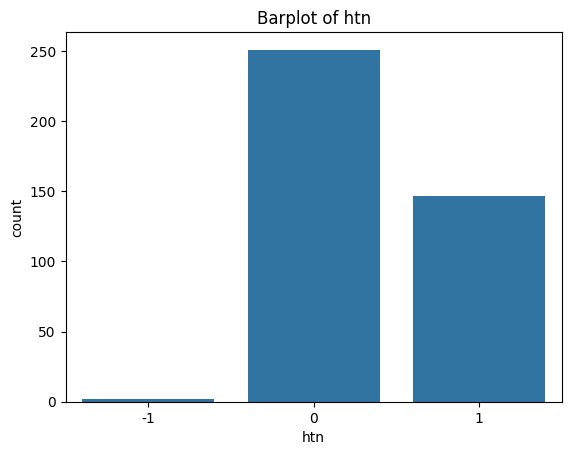

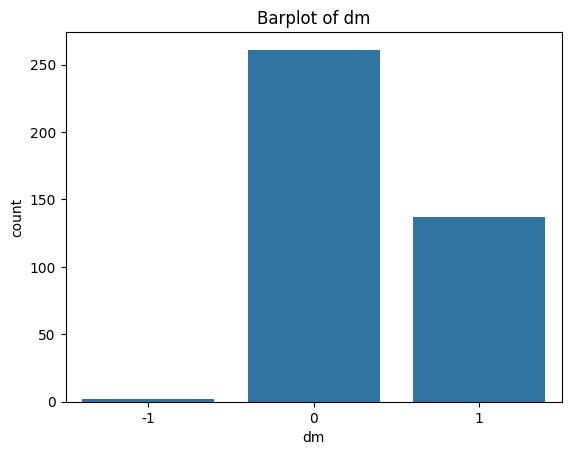

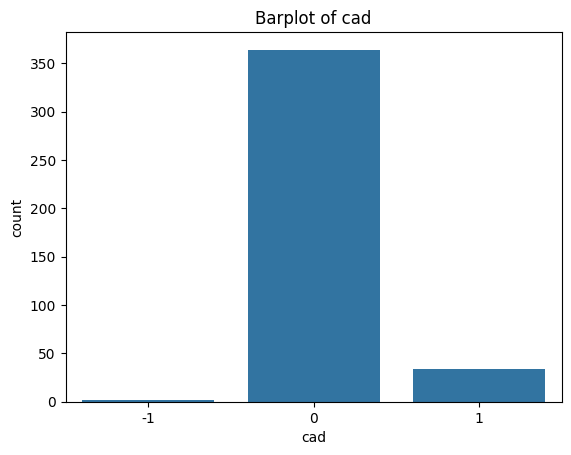

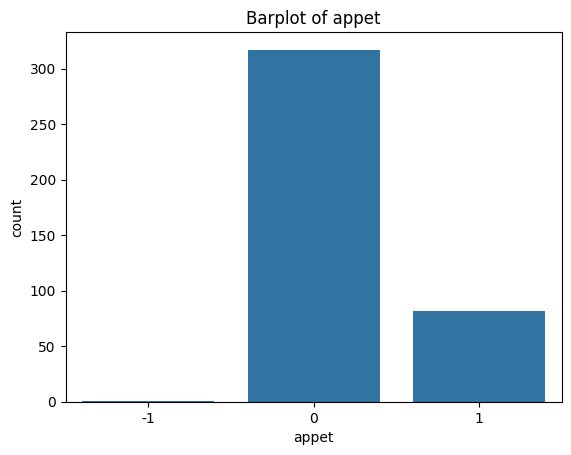

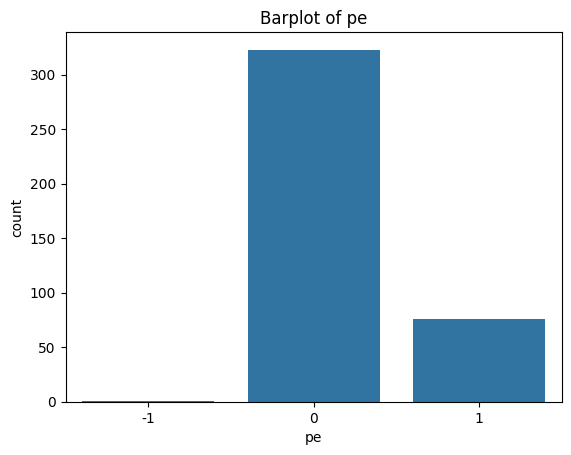

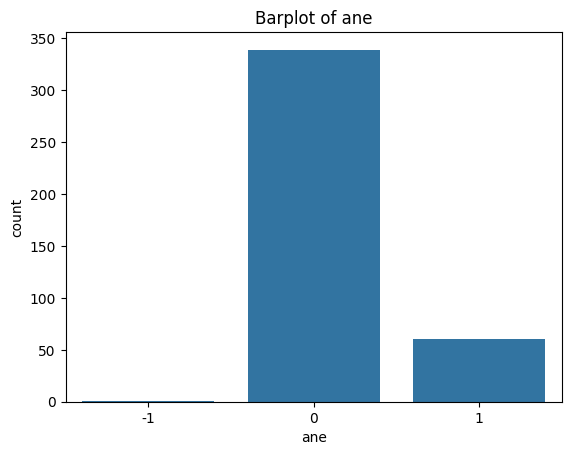

In [141]:
#categorical variables
categorical=X1.select_dtypes(include=['category','int8'])
for column in categorical.columns:
    plt.figure()
    sns.countplot(x=column, data=categorical)
    plt.title(f'Barplot of {column}')
    plt.show()

We use heatmap for numerical variables and barplot for categorical variables.

For heatmap:

1). This is a symmetric matrix and the elements on the diagonal are the variance. The diagonal of the correlation matrix is 1. 

2). The elements not on the diagonal are the covariance.

3). The smallest number in the matrix is -0.69 which means "sod" and "sc" are neagtively correlated.

4). The largest number in the matrix is 1 (the diagonal).

5). The largest number other than 1 is 0.9 which means "hemo" and "pcv" are positively correlated.

For barplots:

1). In those binary variables, the category “-1” could suggest missing values.

2). For example, in "pe" (pedal edema), the most common category is "0", which could imply the absence of pedal edema, and the second most common category is "1", which could imply the presence of pedal edema, and the least category “-1” are missing values.

3). "htn" (hypertension) and "dm" (diabetes mellitus) are not good since the diistribution is not extreme.

5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

In [142]:
X.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

In [143]:
y.isnull().sum()

class    0
dtype: int64

In [144]:
#way2
float_na=X1[float_col].isna()
float_nasum=float_na.sum()
print(float_nasum)

cat_na=X1[columns_to_convert].isna()
cat_nasum=cat_na.sum()
print(cat_nasum)

binary_na = (X1[object_convert] == -1)
binary_nasum=binary_na.sum()
print(binary_nasum)

age       9
bp       12
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wbcc    106
rbcc    131
dtype: int64
sg    47
al    46
su    49
dtype: int64
rbc      152
pc        65
pcc        4
ba         4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


Missing values: There are 9 missing values in "age", 12 missing values in "bp", 47 missing values in "sg", 46 missing values in "al", 49 missing values in "su", 152 missing values in "rbc", 65 missing values in "pc", 4 missing values in "pcc", 4 missing values in "ba", 44  missing values in "bgr", 19  missing values in "bu", 17  missing values in "sc", 87 missing values in "sod", 88 missing values in "pot", 52 missing values in "hemo", 71 missing values in "pcv", 106 missing values in "wbcc", 131 missing values in "rbcc", 2  missing values in "htn", 2  missing values in "dm", 2 missing values in "cad", 1 missing value in "appet", 1 missing value in "pe" and 1 missing value in "ane".

0 missing value in "class".

In [145]:
#the stragegy for addressing missing values
X1_drop= X1.dropna()
X1_drop


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
3,-0.203139,-0.473370,1.005,4.0,0.0,1,0,1,0,-0.392022,...,-0.456071,-0.766953,-0.580420,-0.788961,1,0,0,1,1,1
5,0.496661,0.990117,1.015,3.0,0.0,-1,-1,0,0,-0.935155,...,-0.112239,0.012867,-0.206202,-0.300401,1,1,0,0,1,0
9,0.088445,0.990117,1.020,2.0,0.0,0,0,1,0,-0.985679,...,-1.040585,-1.101161,1.256651,-0.984385,1,1,0,1,0,1
11,0.671612,-0.473370,1.010,3.0,0.0,0,0,1,0,2.929931,...,-0.593604,-0.766953,-1.328856,-0.886673,1,1,0,1,1,0
12,0.963195,-0.473370,1.015,3.0,1.0,-1,1,1,0,0.757399,...,-0.971819,-1.212564,1.290671,-1.277521,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,1.020,0.0,0.0,1,1,0,0,-0.101509,...,1.091172,0.904090,-0.580420,0.188159,0,0,0,0,0,0
396,-0.553039,-0.473370,1.025,0.0,0.0,1,1,0,0,-0.922524,...,1.366237,1.683910,-0.206202,1.458415,0,0,0,0,0,0
397,-2.302541,0.258373,1.020,0.0,0.0,1,1,0,0,-0.606749,...,1.125555,1.126896,-0.614440,0.676719,0,0,0,0,0,0
398,-2.010957,-1.205114,1.025,0.0,0.0,1,1,0,0,-0.429915,...,0.575424,1.349701,-0.410321,1.165279,0,0,0,0,0,0


dropped the columns if the missing value of this variable is greater than 44.

In [146]:
missing_values_count = X1.isna().sum()
columns_to_drop = missing_values_count[missing_values_count > 50].index
columns_to_drop

Index(['sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc'], dtype='object')

In [147]:
X1_dropped = X1.drop(columns=columns_to_drop)
X1_dropped

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,1.020,1.0,0.0,-1,1,0,0,-0.341498,-0.424804,-0.326574,1,1,0,0,0,0
1,-2.594124,-1.936857,1.020,4.0,0.0,-1,1,0,0,NaN,-0.781687,-0.396338,0,0,0,0,0,0
2,0.613295,0.258373,1.010,2.0,3.0,1,1,0,0,3.473064,-0.087748,-0.221928,0,1,0,1,0,1
3,-0.203139,-0.473370,1.005,4.0,0.0,1,0,1,0,-0.392022,-0.028268,0.126891,1,0,0,1,1,1
4,-0.028189,0.258373,1.010,2.0,0.0,1,1,0,0,-0.530963,-0.623073,-0.291692,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,1.020,0.0,0.0,1,1,0,0,-0.101509,-0.167055,-0.448661,0,0,0,0,0,0
396,-0.553039,-0.473370,1.025,0.0,0.0,1,1,0,0,-0.922524,-0.523939,-0.326574,0,0,0,0,0,0
397,-2.302541,0.258373,1.020,0.0,0.0,1,1,0,0,-0.606749,-0.623073,-0.431220,0,0,0,0,0,0
398,-2.010957,-1.205114,1.025,0.0,0.0,1,1,0,0,-0.429915,-0.147229,-0.361456,0,0,0,0,0,0


In [148]:
numerical_cols = X1_dropped.select_dtypes(include=['number']).columns
column_means = X1_dropped[numerical_cols].mean()

X1_filled = X1_dropped.copy()
X1_filled[numerical_cols] = X1_filled[numerical_cols].fillna(column_means)

Replacing the missing value by the mean of the variables for numerical variables.

In [149]:
from sklearn.impute import SimpleImputer

In [150]:
obj_col = X1_filled.select_dtypes(include=['category']).columns.tolist()
cat_imputer = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
X1_filled.loc[:, obj_col] = cat_imputer.fit_transform(X1_filled.loc[:, obj_col])

Replacing the missing value by the most frequency input of the variables for categorical variables.

In [151]:
X1_filled.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

The strategy we used for addressing the missing value is:
1. Replacing the missing value of the numerical variables by its variable means.
2. Using the most frequent input to replaced the missing value for categorical variables.

The reason we delete the variables which have missing value size greater than 50 is becasue that large missing value may indicate problems in data qualities. If we using the above stategy to addressing the missing value, the value we replaced may cause 100% accuracy when classified the model. Thus, the most value this variable has missed, the most inaccuracy that the variable will cause when we classified it.
Also when the missing vlues is too large, lets say in "rbc", there are 152 missing vlues out of 400, then even though we train them and use althorithm to work on them, we will learn nothing from it.

In some algorithms, the missing values can be seen as a seperate category. For instance, in decision tree, KNN, etc. Moreover, when using the KNN classifier, the code can not train on "NA" response values.

6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.

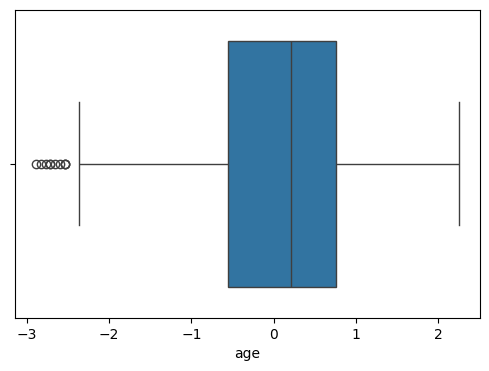

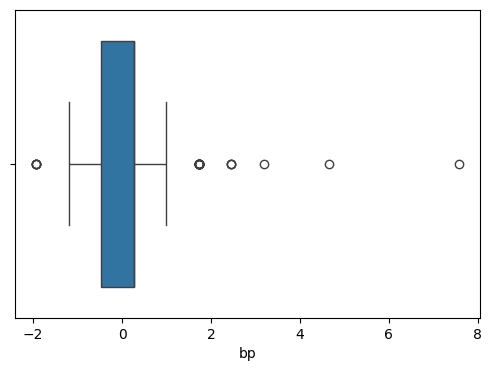

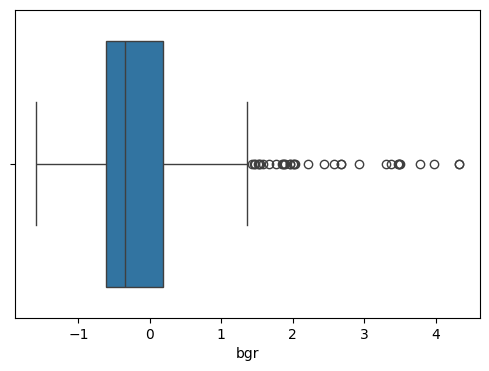

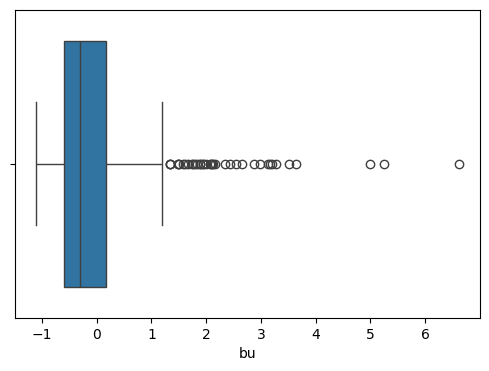

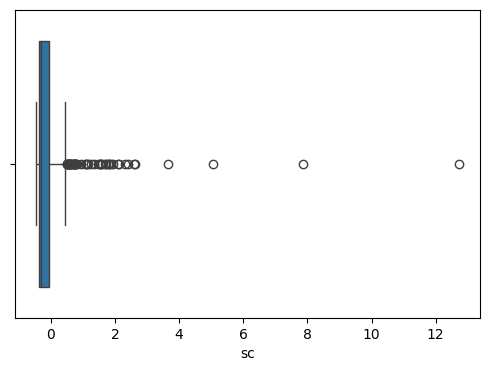

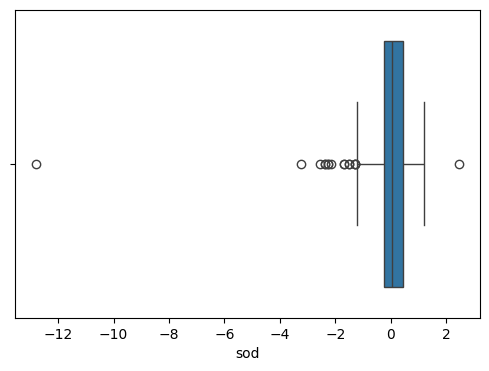

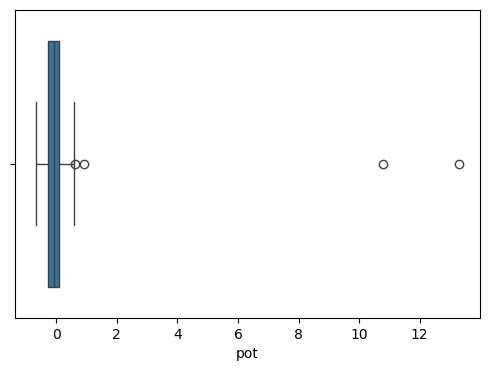

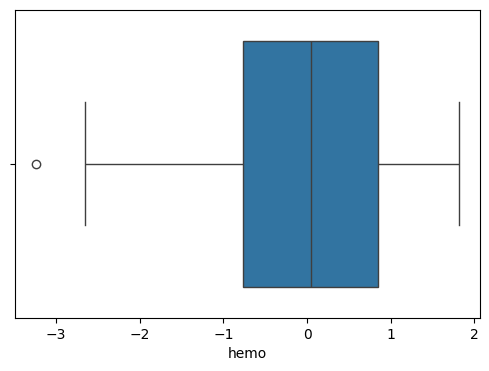

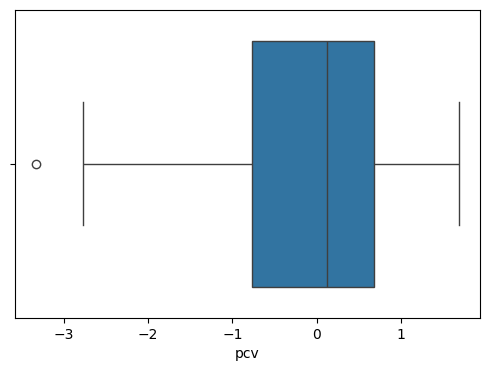

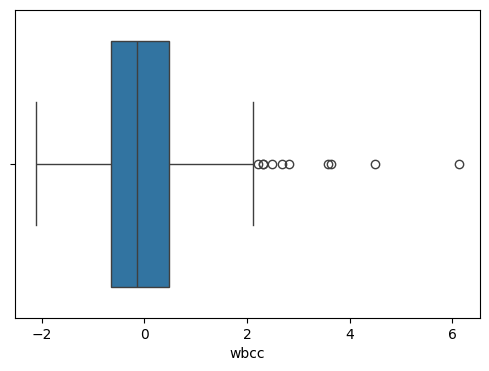

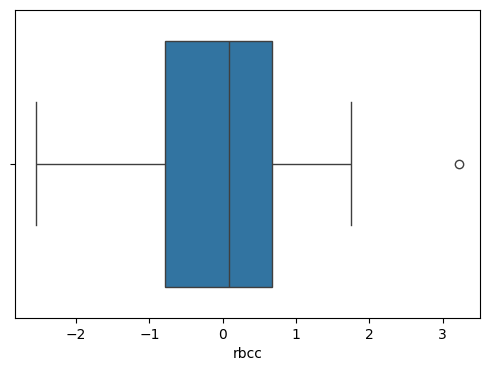

In [152]:
for col in float_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=X1.select_dtypes(include=['float64'])[col])
    plt.xlabel(col)
    plt.show()

7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

In [153]:
#prof says use K-means
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm
from sklearn.impute import KNNImputer

In [154]:
y['class'] = y["class"].astype('category').cat.codes
y

/var/folders/4r/l7zfgmsx0_7_kz30gzg50y880000gn/T/ipykernel_4221/3718594032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y["class"].astype('category').cat.codes


,class
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [155]:
km1 = KMeans(n_clusters=2, n_init=20, random_state=0)
km1.fit(y)
km1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [156]:
# imputer = KNNImputer(n_neighbors=5)
# X_imputed = pd.DataFrame(imputer.fit_transform(X1), columns=X1.columns)
# X_imputed.head()
# X_imputed.isna().sum()

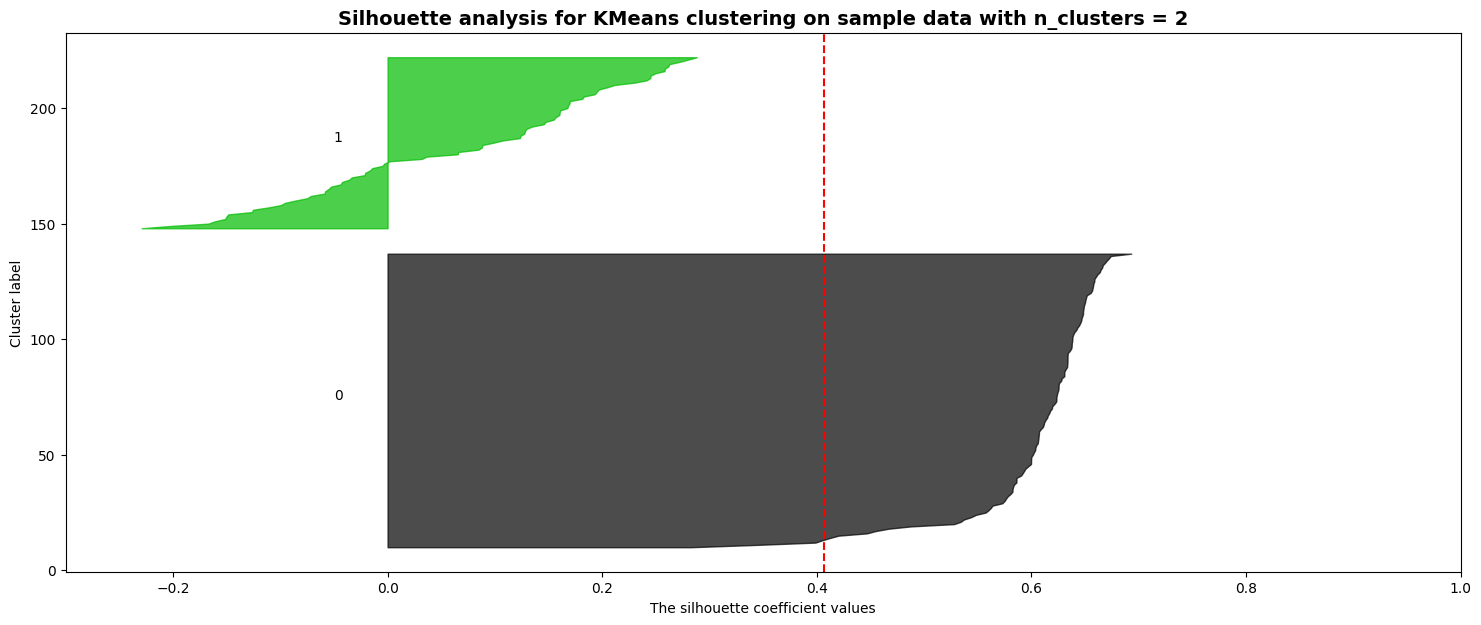

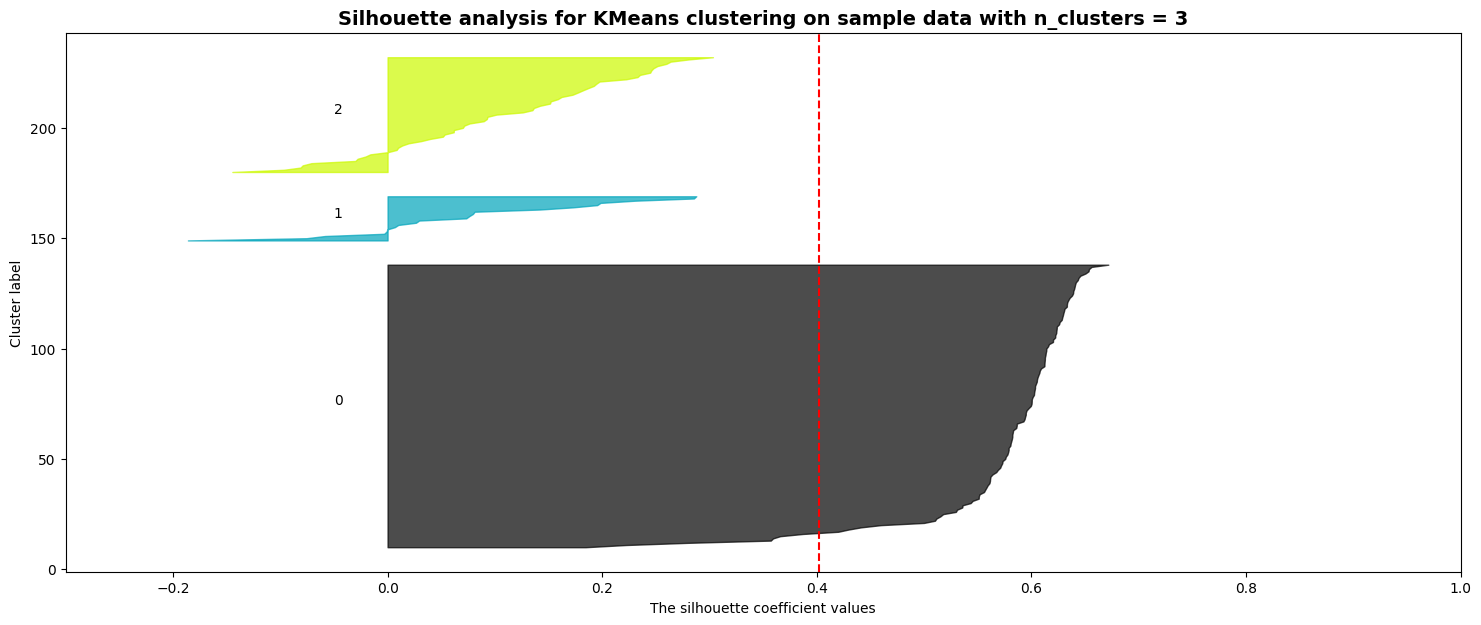

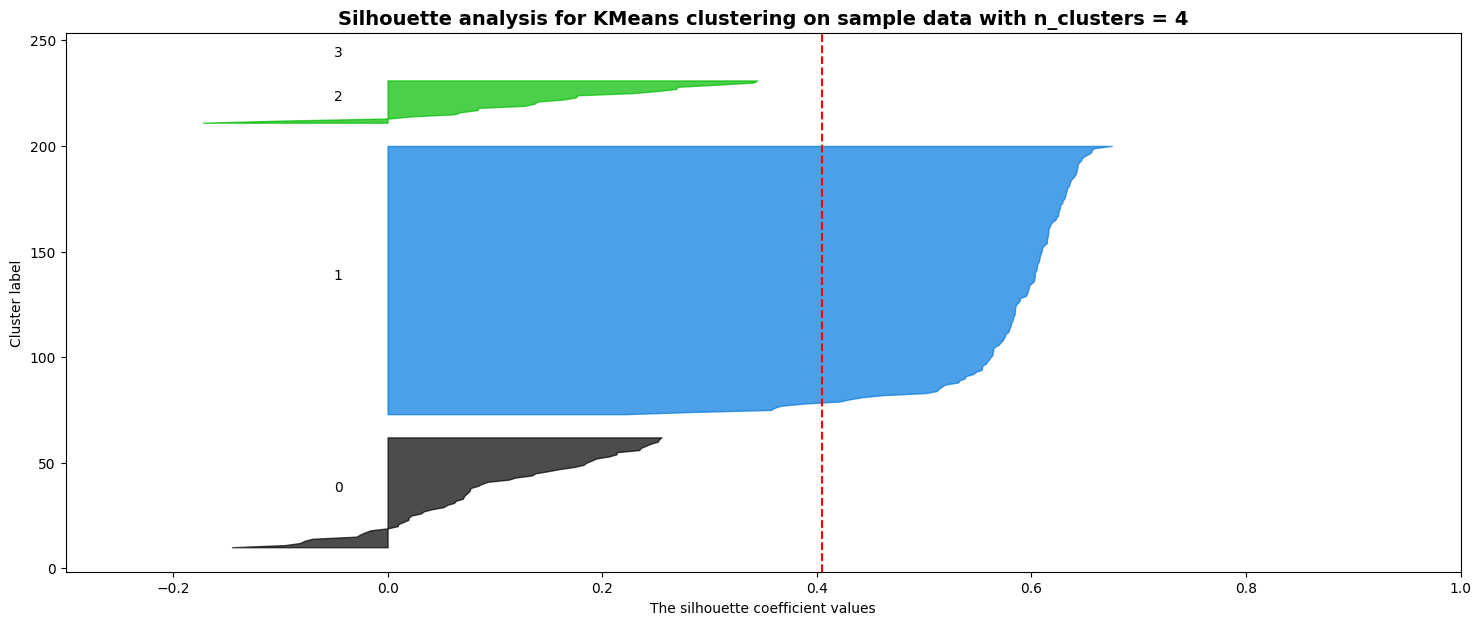

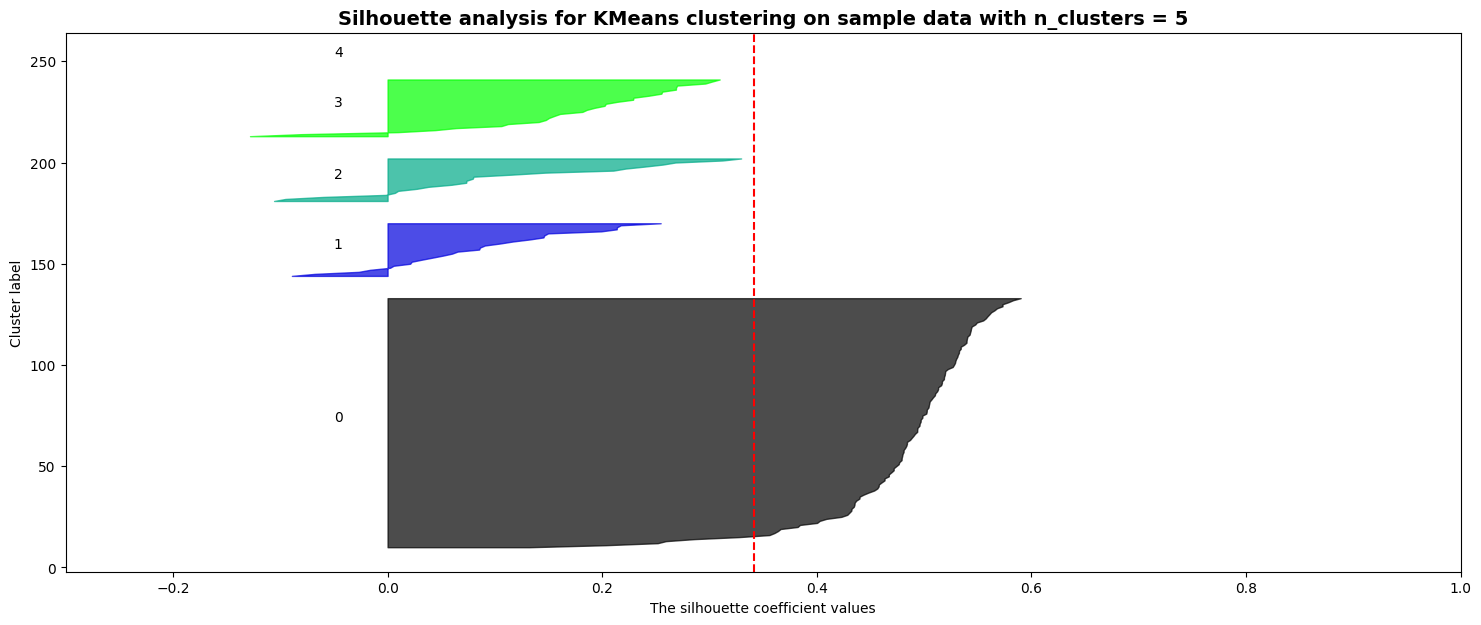

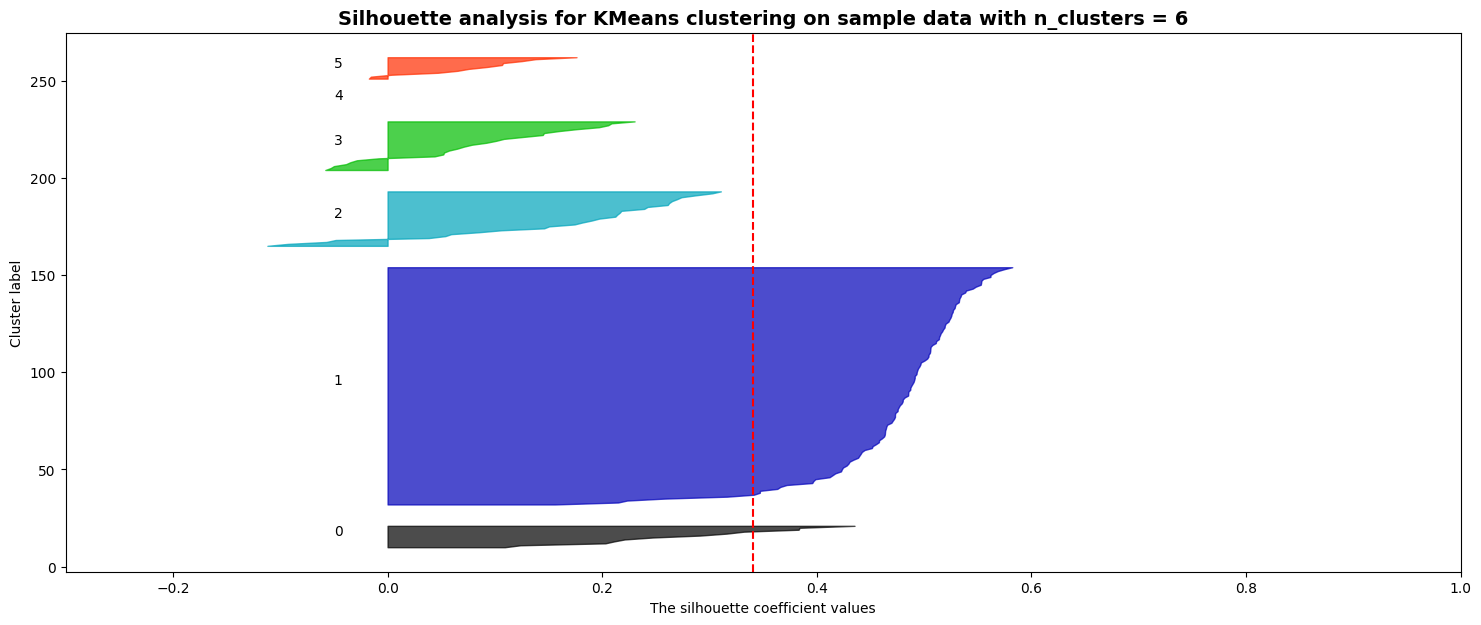

In [157]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    labels = km.fit_predict(X1_drop)
    
    silhouette_avg = silhouette_score(X1_drop, labels)
    sample_silhouette_values = silhouette_samples(X1_drop, labels)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.3, 1])

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Use the colormap for coloring
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            y=np.arange(y_lower, y_upper),
            x1=0,
            x2=ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [158]:
kmeans = KMeans(n_clusters=2, n_init=20, random_state=0)
labels = kmeans.fit_predict(y)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [159]:
pca_X = PCA()
X = pd.DataFrame(X1_filled, X1_filled.index, X1_filled.columns)

In [160]:
pca_loading = pd.DataFrame(pca_X.fit(X).components_.T, index=X1_filled.columns, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
            'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18'
           # , 'pc19', 'pc20','pc21', 'pc22', 'pc23', 'pc24']
            ])
pca_loading

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18
age,0.227990,0.230990,0.295718,-0.031051,-0.575582,-0.656010,0.133337,0.002424,0.021785,0.106275,0.087249,-0.005996,-0.072212,-0.030075,-0.020523,0.028124,0.008590,-0.000131
bp,0.218657,0.195864,0.182461,-0.453550,0.717207,-0.375424,-0.036042,0.093023,0.039444,0.050225,0.011311,-0.059212,-0.010045,0.021967,-0.021035,0.006318,-0.027708,-0.000074
sg,-0.001662,0.000410,0.000035,0.000870,0.000296,-0.000717,-0.001237,0.000471,0.001026,-0.000345,-0.000204,-0.000439,-0.001242,0.000101,0.002045,0.000711,-0.000163,-0.999993
al,0.553457,-0.487707,-0.482395,-0.347007,-0.140393,0.010337,0.180866,0.053118,0.087756,0.140633,-0.040164,-0.044882,-0.052630,-0.088915,0.051738,0.045776,-0.028320,-0.001417
su,0.357932,-0.308756,0.426065,0.400909,0.206522,0.046562,0.154558,-0.475340,0.349520,-0.053288,0.048204,0.080309,-0.031265,-0.013888,0.057497,-0.037233,0.000485,-0.000284
rbc,-0.160721,-0.314032,-0.325148,0.422191,0.147226,-0.553442,-0.342586,0.238952,0.237721,-0.175211,-0.031346,0.000360,-0.007096,-0.027305,0.009040,0.008699,0.000655,0.001812
pc,-0.174043,-0.281904,-0.051507,0.116840,0.165232,-0.277618,0.505481,-0.186919,-0.676205,-0.103822,-0.045082,0.014676,0.023384,0.022089,-0.087694,-0.001867,0.010102,-0.001056
pcc,0.071946,-0.044355,-0.032420,-0.030809,-0.042205,-0.030729,-0.036475,0.017117,0.033291,0.076854,0.110533,0.399884,0.571721,0.290412,-0.401582,-0.291199,-0.387420,-0.001940
ba,0.043953,-0.029370,-0.034667,-0.031891,0.001018,-0.018845,-0.006731,-0.005783,0.039313,0.053101,0.088358,0.062135,0.305589,0.201282,-0.143258,-0.045668,0.906648,-0.000950
bgr,0.337320,-0.236555,0.377282,0.237826,0.014970,0.158208,-0.269555,0.548677,-0.422632,0.175746,0.092447,-0.068132,-0.063024,0.073497,-0.014852,-0.003808,0.009626,-0.000387


In [161]:
pc_scores = pd.DataFrame(pca_X.fit_transform(X), columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
            'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18'], index=X.index)
pc_scores

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18
0,-0.159842,0.123121,0.340298,-1.076715,-0.028920,0.446685,0.604284,-0.200452,-0.546039,-0.364657,-0.842538,-0.059156,0.157167,-0.180785,-0.072629,-0.180885,0.047535,-0.004802
1,0.080324,-2.658949,-2.090773,-0.980571,-0.533556,2.899035,1.077587,0.010434,-0.315841,0.588647,-0.266191,-0.072513,-0.046053,-0.212571,0.230084,0.116876,-0.070095,-0.007841
2,2.748405,-2.445865,1.908401,1.610708,0.460511,-0.398526,-0.557039,0.808465,-0.761516,0.015210,0.839123,0.372502,-0.218667,-0.857423,-0.036765,0.509675,0.068492,0.004443
3,1.597823,-1.458225,-2.420973,-0.957120,-0.769911,-0.046338,-0.110910,0.412311,0.653469,-0.644466,0.573749,0.930272,-0.252829,0.176819,-0.106789,-0.218285,-0.391016,0.009068
4,-0.378850,-1.060810,-0.899482,-0.559600,0.156071,-0.818241,0.426550,0.266685,0.309952,0.274505,-0.050614,-0.107902,-0.121260,-0.157326,0.058309,0.121835,-0.058056,0.008252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.170494,-0.047818,0.180807,0.277176,0.311051,-0.960873,-0.289116,0.125640,-0.220852,0.196804,0.072544,-0.107163,-0.038038,0.051432,-0.022183,0.012504,-0.002590,0.000838
396,-1.872246,-0.239130,-0.396054,0.399566,0.208608,-0.289936,0.067806,-0.182926,0.220656,-0.145617,-0.064322,0.042303,0.058668,-0.007166,-0.005702,0.007469,0.008988,-0.003650
397,-2.067094,-0.656654,-0.599016,0.127848,1.723678,0.628361,-0.291070,0.061005,0.098355,-0.254760,-0.179508,-0.002508,0.153018,0.085282,0.009032,-0.032475,-0.022143,0.001462
398,-2.076334,-0.721928,-0.895292,0.973608,0.546345,0.997310,-0.405810,-0.172560,-0.183314,-0.170172,-0.165920,0.014747,0.158318,0.060760,0.056156,-0.059413,0.015754,-0.003672


In [162]:
var=pc_scores.var()
var

pc1     3.011006
pc2     1.418726
pc3     1.376123
pc4     0.871790
pc5     0.843322
pc6     0.780234
pc7     0.413204
pc8     0.356221
pc9     0.333497
pc10    0.193763
pc11    0.135449
pc12    0.107061
pc13    0.098757
pc14    0.082265
pc15    0.071608
pc16    0.058557
pc17    0.044481
pc18    0.000018
dtype: float64

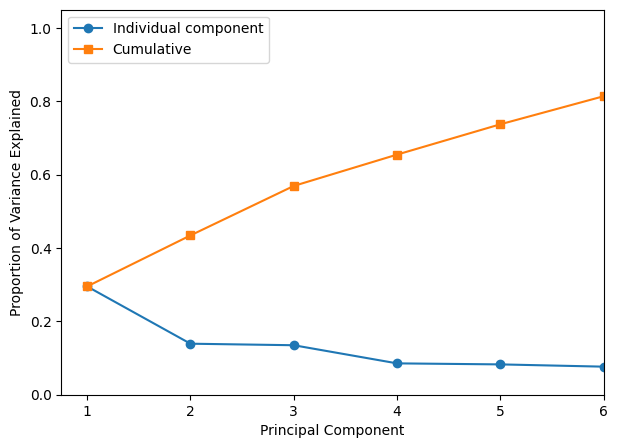

In [163]:
plt.figure(figsize=(7,5))

plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
, pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
, np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6])
plt.legend(loc=2);

In [164]:
pca_loading

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18
age,0.227990,0.230990,0.295718,-0.031051,-0.575582,-0.656010,0.133337,0.002424,0.021785,0.106275,0.087249,-0.005996,-0.072212,-0.030075,-0.020523,0.028124,0.008590,-0.000131
bp,0.218657,0.195864,0.182461,-0.453550,0.717207,-0.375424,-0.036042,0.093023,0.039444,0.050225,0.011311,-0.059212,-0.010045,0.021967,-0.021035,0.006318,-0.027708,-0.000074
sg,-0.001662,0.000410,0.000035,0.000870,0.000296,-0.000717,-0.001237,0.000471,0.001026,-0.000345,-0.000204,-0.000439,-0.001242,0.000101,0.002045,0.000711,-0.000163,-0.999993
al,0.553457,-0.487707,-0.482395,-0.347007,-0.140393,0.010337,0.180866,0.053118,0.087756,0.140633,-0.040164,-0.044882,-0.052630,-0.088915,0.051738,0.045776,-0.028320,-0.001417
su,0.357932,-0.308756,0.426065,0.400909,0.206522,0.046562,0.154558,-0.475340,0.349520,-0.053288,0.048204,0.080309,-0.031265,-0.013888,0.057497,-0.037233,0.000485,-0.000284
rbc,-0.160721,-0.314032,-0.325148,0.422191,0.147226,-0.553442,-0.342586,0.238952,0.237721,-0.175211,-0.031346,0.000360,-0.007096,-0.027305,0.009040,0.008699,0.000655,0.001812
pc,-0.174043,-0.281904,-0.051507,0.116840,0.165232,-0.277618,0.505481,-0.186919,-0.676205,-0.103822,-0.045082,0.014676,0.023384,0.022089,-0.087694,-0.001867,0.010102,-0.001056
pcc,0.071946,-0.044355,-0.032420,-0.030809,-0.042205,-0.030729,-0.036475,0.017117,0.033291,0.076854,0.110533,0.399884,0.571721,0.290412,-0.401582,-0.291199,-0.387420,-0.001940
ba,0.043953,-0.029370,-0.034667,-0.031891,0.001018,-0.018845,-0.006731,-0.005783,0.039313,0.053101,0.088358,0.062135,0.305589,0.201282,-0.143258,-0.045668,0.906648,-0.000950
bgr,0.337320,-0.236555,0.377282,0.237826,0.014970,0.158208,-0.269555,0.548677,-0.422632,0.175746,0.092447,-0.068132,-0.063024,0.073497,-0.014852,-0.003808,0.009626,-0.000387


In [165]:
PCA_var=sum(pca_X.explained_variance_ratio_[0:2])
PCA_var

0.4344542793757311

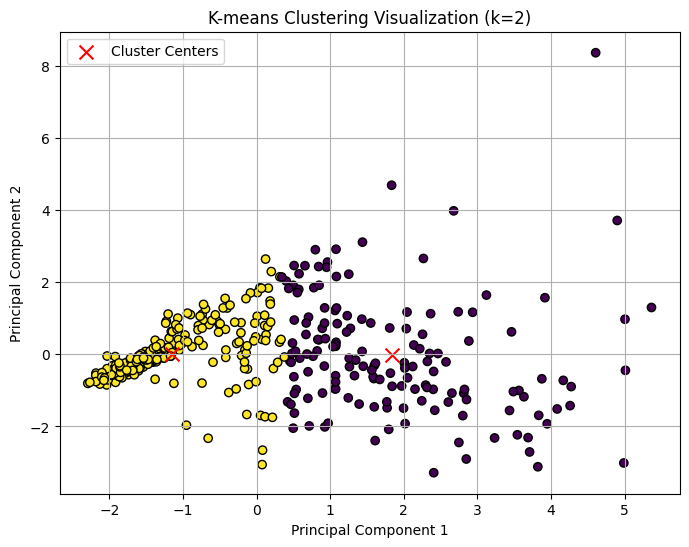

In [166]:
plt.figure(figsize=(8, 6))

principal_components = pca_X.fit_transform(X)
kmeans = KMeans(n_clusters=2, n_init=20, random_state=0)
kmeans.fit(principal_components)
cluster_labels = kmeans.labels_

# Plot data points
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red', s=100, label='Cluster Centers')

plt.title('K-means Clustering Visualization (k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [167]:
y_1d = np.ravel(y)

adjusted_Rand_index = adjusted_rand_score(y_1d, cluster_labels)

adjusted_Rand_index

0.2663417112554181

8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.


In [168]:
X_train, X_test, y_train, y_test = train_test_split(
    X1_filled, y, test_size=0.3, random_state=0, stratify=y) #or test_size=0.7

9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.

## Algorithm 1: Dicision tree

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [170]:
cs_dt = DecisionTreeClassifier(
    max_depth =30, 
    random_state=1
) 

In [171]:
cs_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, random_state=1)

[Text(0.4642857142857143, 0.9166666666666666, 'sc <= -0.318\ngini = 0.469\nsamples = 280\nvalue = [175, 105]\nclass = notckd'),
 Text(0.21428571428571427, 0.75, 'sg <= 1.017\ngini = 0.351\nsamples = 132\nvalue = [30, 102]\nclass = ckd'),
 Text(0.14285714285714285, 0.5833333333333334, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]\nclass = notckd'),
 Text(0.2857142857142857, 0.5833333333333334, 'al <= 0.5\ngini = 0.12\nsamples = 109\nvalue = [7, 102]\nclass = ckd'),
 Text(0.21428571428571427, 0.4166666666666667, 'rbc <= 0.0\ngini = 0.019\nsamples = 103\nvalue = [1.0, 102.0]\nclass = ckd'),
 Text(0.14285714285714285, 0.25, 'pc <= 0.0\ngini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = ckd'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = ckd'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = notckd'),
 Text(0.2857142857142857, 0.25, 'gini = 0.0\nsamples = 95\nvalue = [0, 95]\nclass = ckd'),
 

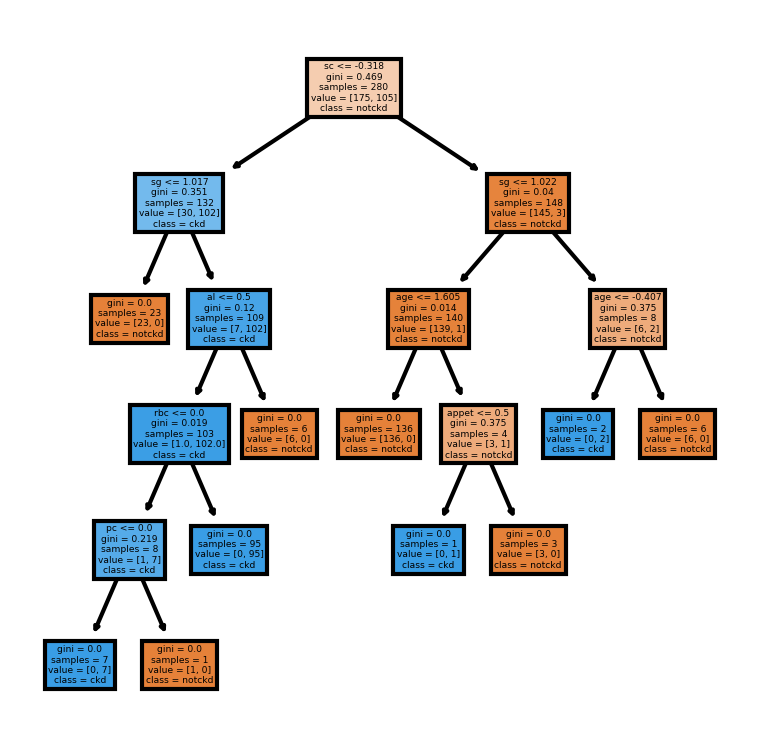

In [172]:
fig, axes = plt.subplots(
    nrows = 1,ncols = 1,figsize = (3,3), dpi=300
    )
plot_tree(
    cs_dt, 
    max_depth= 30, 
    feature_names = X_train.columns.tolist(), 
    class_names=['notckd', 'ckd'], 
    filled = True
    )

In [173]:
pred = cs_dt.predict(X_test)
pred[:5]

array([0, 0, 0, 0, 0], dtype=int8)

In [174]:
cm = pd.DataFrame(confusion_matrix(y_test, pred), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

Predicted,No,Yes
True,,
No,72,3
Yes,1,44


In [175]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.94      0.98      0.96        45

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



In [176]:
path = cs_dt.cost_complexity_pruning_path(
    X_train, 
    y_train
)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [177]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=0, 
        ccp_alpha=ccp_alpha
        )
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [178]:
depth = [clf.tree_.max_depth for clf in clfs]
depth

[5, 4, 3, 3, 2, 1, 0]

In [179]:
test_score = [clf.score(X_test, y_test) for clf in clfs]

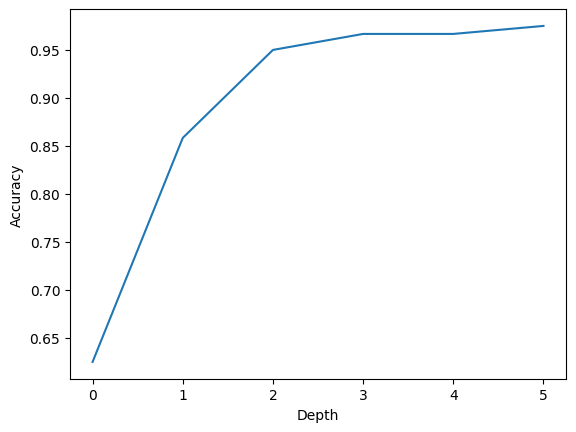

In [180]:
plt.plot(depth, test_score)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [181]:
cs_dt_new = DecisionTreeClassifier(
    max_depth =3, 
    random_state=1
) 

In [182]:
cs_dt_new.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

[Text(0.4230769230769231, 0.875, 'sc <= -0.318\ngini = 0.469\nsamples = 280\nvalue = [175, 105]\nclass = notckd'),
 Text(0.15384615384615385, 0.625, 'sg <= 1.017\ngini = 0.351\nsamples = 132\nvalue = [30, 102]\nclass = ckd'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]\nclass = notckd'),
 Text(0.23076923076923078, 0.375, 'al <= 0.5\ngini = 0.12\nsamples = 109\nvalue = [7, 102]\nclass = ckd'),
 Text(0.15384615384615385, 0.125, 'gini = 0.019\nsamples = 103\nvalue = [1.0, 102.0]\nclass = ckd'),
 Text(0.3076923076923077, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = notckd'),
 Text(0.6923076923076923, 0.625, 'sg <= 1.022\ngini = 0.04\nsamples = 148\nvalue = [145, 3]\nclass = notckd'),
 Text(0.5384615384615384, 0.375, 'age <= 1.605\ngini = 0.014\nsamples = 140\nvalue = [139, 1]\nclass = notckd'),
 Text(0.46153846153846156, 0.125, 'gini = 0.0\nsamples = 136\nvalue = [136, 0]\nclass = notckd'),
 Text(0.6153846153846154, 0.125, 'gini = 0.375\nsamples

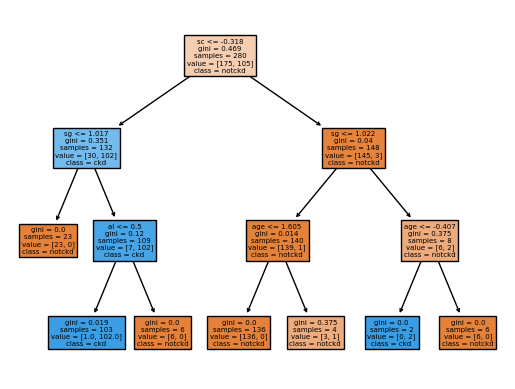

In [183]:

plot_tree(
    cs_dt_new, 
    max_depth= 3, 
    feature_names = X_train.columns.tolist(), 
    class_names=['notckd', 'ckd'], 
    filled = True
    )

In [184]:
pred_new = cs_dt_new.predict(X_test)
pred_new[:5]

array([0, 0, 0, 0, 0], dtype=int8)

In [185]:
cm_new = pd.DataFrame(confusion_matrix(y_test, pred_new), index=['No', 'Yes'], columns=['No', 'Yes'])
cm_new.index.name = 'True'
cm_new.columns.name = 'Predicted'
cm_new

Predicted,No,Yes
True,,
No,72,3
Yes,1,44


In [186]:
print(classification_report(y_test, pred_new))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.94      0.98      0.96        45

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



## Algorithm 2: KNN

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [188]:
x2_train, x2_test, y2_train, y2_test = train_test_split(
    X1_filled,
    y, 
    test_size = 0.3, 
    random_state = 0, 
    stratify = y
    )

In [189]:
k_range = range(1, 15)
scores_r = []

for k in k_range:
    knn_r = neighbors.KNeighborsClassifier(n_neighbors=k)
    y_train_flat = np.ravel(y2_train)
    knn_r.fit(x2_train, y_train_flat)
    y_r_pred = knn_r.predict(x2_test.values)
    scores_r.append(round(metrics.accuracy_score(y2_test, y_r_pred), 2))

/Users/dailing/Desktop/3da-assignment6/.conda/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/dailing/Desktop/3da-assignment6/.conda/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/dailing/Desktop/3da-assignment6/.conda/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/dailing/Desktop/3da-assignment6/.conda/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/dailing/Desktop/3da-assignment6/.conda/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid fe

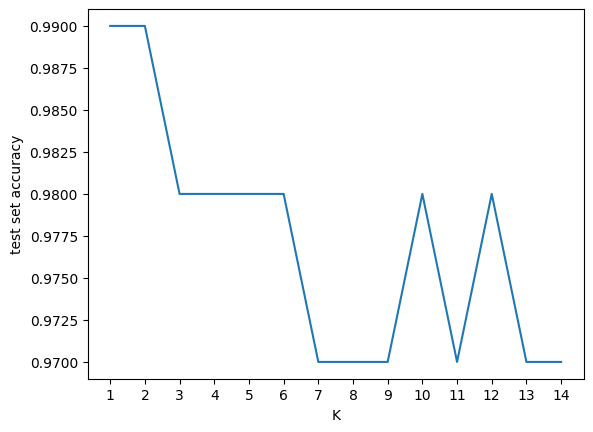

In [190]:
plt.plot(k_range, scores_r)
plt.xlabel('K')
plt.ylabel('test set accuracy')
plt.xticks(range(1,15))
plt.show()

In [191]:
knn3 = neighbors.KNeighborsClassifier(
    n_neighbors = 2,
    algorithm = 'brute'
    )

y_train_flat = np.ravel(y2_train)

knn3.fit(x2_train, y_train_flat)

KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [192]:
pred3 = knn3.predict(x2_test.values)
pred3[1:5]

/Users/dailing/Desktop/3da-assignment6/.conda/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0], dtype=int8)

In [193]:
round(metrics.accuracy_score(y2_test, pred3), 2)

0.99

In [194]:
conf_matrix = confusion_matrix(y2_test, pred3)
print(conf_matrix)

[[74  1]
 [ 0 45]]


10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.

In [195]:
cm = pd.DataFrame(confusion_matrix(y_test, pred), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
print('Confusion Matrix of Decision Tree:')
cm

Confusion Matrix of Decision Tree:


Predicted,No,Yes
True,,
No,72,3
Yes,1,44


For the desicion tree classifier confusion matrix, there are 72 observations been correctly predicted as No, and 44 variables been predicted as Yes truely. Remindered that the y variable has two input, one is no, means this person do not have chronic kidney disease; the other one is yes, means the person has chronic kidney disease.

In [196]:
conf_matrix = pd.DataFrame(confusion_matrix(y2_test, pred3), index=['No', 'Yes'], columns=['No', 'Yes'])
conf_matrix.index.name = 'True'
conf_matrix.columns.name = 'Predicted'
print('Confusion Matrix of KNN:')
conf_matrix

Confusion Matrix of KNN:


Predicted,No,Yes
True,,
No,74,1
Yes,0,45


73 observations without chronic kidney disease in KNN classifier been coreectly predicted as no, and 45 person with chronic kidney disease are correctly predicted as yes.

By comparision of these two confussion matrixs, since the KNN classifier has number of observations of both person with chronic kidney disease and person without chronic kidney disease been predicted truely than the number of observations been predicted by the decision tree classifier. Thus, we considered KNN classifier better than decision tree. Moreover, compare the accuracy score of both classifiers, KNN has 98% accuracy which is greater than decision tree with 97% accuracy.

11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).

We want to do feature selection for decision tree.

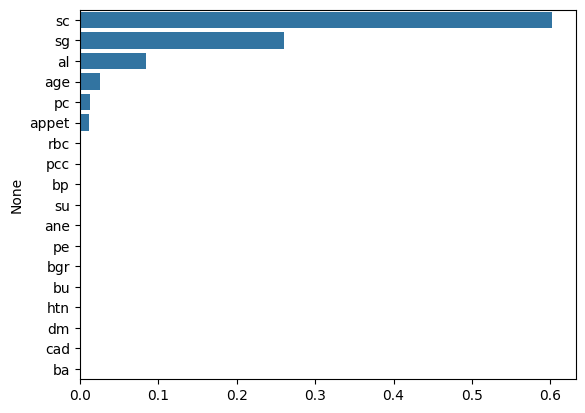

In [197]:
feature_importances = cs_dt.feature_importances_

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]


sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).

In [198]:
conf_matrix = confusion_matrix(y2_test, pred3)
print("KNN Result: ")
print(conf_matrix)


print("Decision Tree Result: " )
cm = pd.DataFrame(confusion_matrix(y_test, pred), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
print(cm)

KNN Result: 
[[74  1]
 [ 0 45]]
Decision Tree Result: 
Predicted  No  Yes
True              
No         72    3
Yes         1   44


From the above confusion matrix, we can observe that KNN has a better result.

13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).

In [199]:
clf = DecisionTreeClassifier(max_depth =6, 
    random_state=1,criterion='entropy')  
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.94      0.98      0.96        45

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



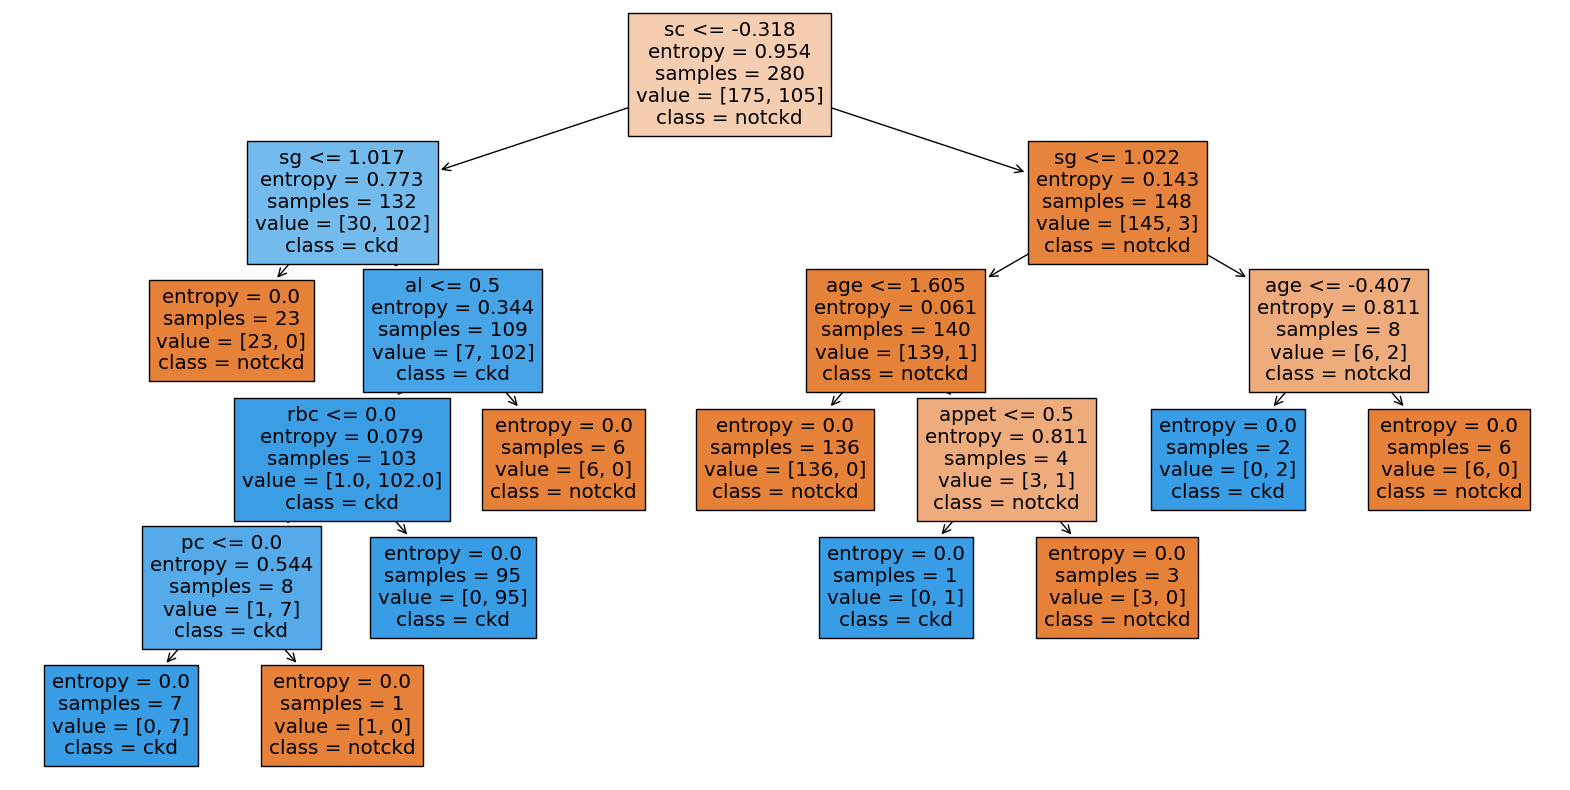

In [200]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


plt.figure(figsize=(20,10))
plot_tree(clf, filled=True,feature_names = X_train.columns.tolist(),class_names=['notckd', 'ckd'])
plt.show()

In [201]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

Predicted,No,Yes
True,,
No,72,3
Yes,1,44


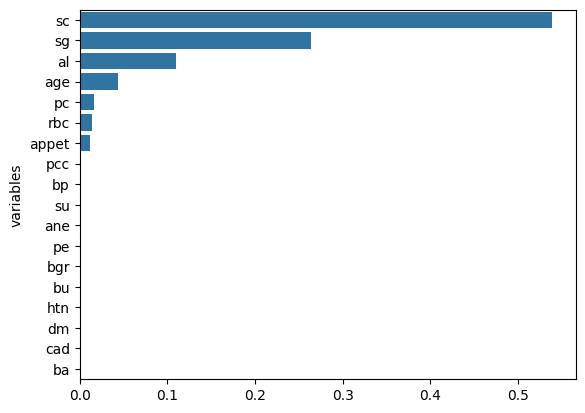

In [202]:
fea_imp = clf.feature_importances_
sorted_indices = fea_imp.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = fea_imp[sorted_indices]
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.ylabel("variables")

plt.show()

We have retrain the model with a different criteria and less depth. This less complicated model give as a better result. We also find features that are significant to the model.

14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).

We can use resampling to improve one classifier performance further, since we have too many missing values in this sample data.

In [211]:
poly = PolynomialFeatures(degree=3, interaction_only=True)
X_polytrain = poly.fit_transform(X_train)
X_polytest = poly.transform(X_test)
logit_model = LogisticRegression()
logit_model.fit(X_polytrain, y_train)
y_polypred = logit_model.predict(X_polytest)
accuracy = accuracy_score(y_test, y_polypred)
accuracy

/Users/dailing/Desktop/3da-assignment6/.conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9833333333333333

Improved Model Accuracy is  0.9833333333333333.

15. **Team Contributions:** Document each team member's specific contributions related to the questions above.

Ling Dai(400220798): Question Question 1-6,8,9,14

Shujia Zhang(400390028): Question 2, 5, 7,10,11,12,13

Yunxin Li(400323756):3,4, 10, 11, 12, 13

All team memebers are participated in this project actively. We have a lot of disscusion and communication during the projects, so most of the code are actually done together offline in school.

16. **Link** to the public GitHub repository.

https://github.com/dail9/3da-assignment6/blob/main/assignment6.ipynb

\newpage

## Reference